In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-prices-dataset/Housing.csv


In [2]:
df = pd.read_csv('/kaggle/input/housing-prices-dataset/Housing.csv')

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [12]:
cats = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cats, drop_first=True)

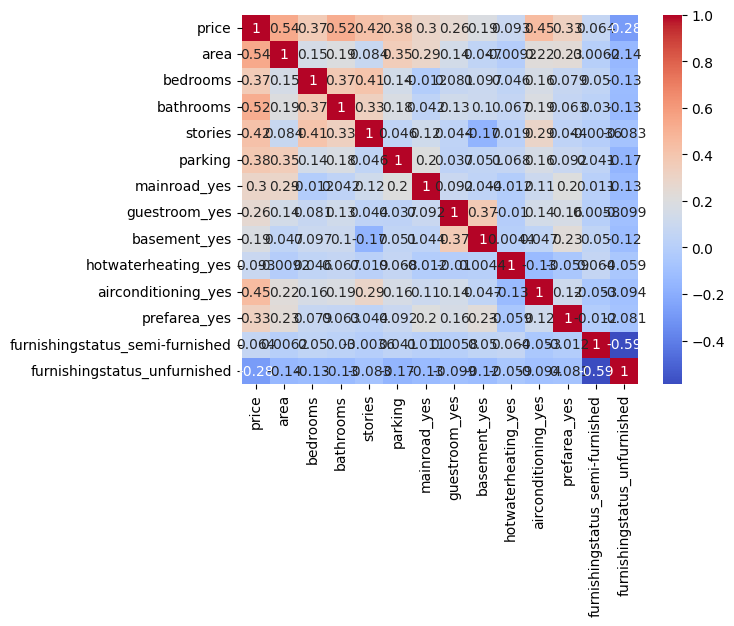

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop('price', axis=1)
y = df['price']

model = RandomForestRegressor()
model.fit(X, y)

pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

area                               0.452055
bathrooms                          0.162400
parking                            0.061831
airconditioning_yes                0.057675
stories                            0.051277
bedrooms                           0.043114
prefarea_yes                       0.037802
furnishingstatus_unfurnished       0.036288
basement_yes                       0.032322
guestroom_yes                      0.020773
hotwaterheating_yes                0.019126
furnishingstatus_semi-furnished    0.017795
mainroad_yes                       0.007543
dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred, squared=False))
print(r2_score(y_test, y_pred))

1067827.1898019868
0.609261608450721


In [22]:
import numpy as np

indices = np.random.choice(len(X_test), size=5, replace=False)

sample_X = X_test.iloc[indices]
sample_y = y_test.iloc[indices]
sample_p = model.predict(sample_X)

comparison_df = pd.DataFrame({
    'Actual Price': sample_y.values,
    'Predicted Price': sample_p
}, index=sample_y.index)

print(comparison_df)

     Actual Price  Predicted Price
150       5600000     5.534814e+06
48        7455000     4.567891e+06
396       3500000     3.522505e+06
375       3640000     4.750088e+06
338       3885000     4.500645e+06
